In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(8,8) #rescale figures
sc.settings.verbosity = 3

In [2]:
input_file = "/lustre/scratch117/cellgen/team205/rl20/CTCL/object-new/Stroma_integration_downsample0.3_forMilo_ok.h5ad"
adata = sc.read_h5ad(input_file)

In [3]:
adata.obs['annotation'].value_counts()

Differentiated_KC      34176
VE2                    14357
F2                     11460
Undifferentiated_KC     9595
F3                      8846
Pericyte_1              7129
Differentiated_KC*      6353
F1                      4520
Melanocyte              4127
VE1                     3719
LE2                     1632
VE3                     1430
LE1                     1350
Proliferating_KC        1272
Pericyte_2              1049
Schwann_1                439
Name: annotation, dtype: int64

In [4]:
adata = adata.raw.to_adata()
adata.X.max()

8.664627

In [5]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=30)

computing neighbors
    using 'X_pca' with n_pcs = 30


/home/jovyan/my-conda-envs/myenv_old/lib/python3.7/site-packages/numba/core/typed_passes.py:327: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see https://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../my-conda-envs/myenv_old/lib/python3.7/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  state.func_ir.loc))
/home/jovyan/my-conda-envs/myenv_old/lib/python3.7/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see https://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../.

    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:24)


In [6]:
adata.obs['Condition'] = "a_Other"
ctcl = adata.obs['integrated_sample_id'] == 'CTCL'
adata.obs.loc[ctcl, 'Condition'] = 'CTCL'

In [7]:
adata.obs['Condition'].unique

<bound method Series.unique of GGAAAGCAGTCACGCC-1-18-CTCL                       CTCL
AAGGCAGGTCTCAACA-1-SKN8090567-AD              a_Other
GCGGGTTGTTCTGAAC-1-SKN8090603-Psoriasis       a_Other
CGACCTTCAGCTGCAC-1-SKN8090543-AD              a_Other
TTGCCGTTCGCCTGAG-1-SKN8090551-AD              a_Other
                                               ...   
ATTGGACGTCAATGTC-1-SKN8104899-Healthy         a_Other
GCGCCAAGTGTGACCC-1-SKN8105198-Healthy         a_Other
ACAGCTATCGCCTGAG-1-4820STDY7389001-Healthy    a_Other
TCATTTGTCTTCATGT-1-SKN8090529-AD              a_Other
CCTAAAGCACGAAAGC-1-30-CTCL                       CTCL
Name: Condition, Length: 111454, dtype: object>

In [8]:
import anndata2ri
import rpy2.rinterface_lib.callbacks
import logging

In [9]:
# Ignore R warning messages
#Note: this can be commented out to get more verbose R output
rpy2.rinterface_lib.callbacks.logger.setLevel(logging.ERROR)

In [10]:
anndata2ri.activate()

In [11]:
%load_ext rpy2.ipython

In [12]:
%%R
library(miloR)
library(igraph)
library(SingleCellExperiment)
library(scater)
library(scran)
library(dplyr)
library(patchwork)

In [13]:
adata_no_knn = adata.copy()
adata_no_knn.obsp = None
adata_no_knn.uns.pop("neighbors")

OverloadedDict, wrapping:
	{'connectivities_key': 'connectivities', 'distances_key': 'distances', 'params': {'n_neighbors': 10, 'method': 'umap', 'random_state': 0, 'metric': 'euclidean', 'n_pcs': 30}, 'rp_forest': {'hyperplanes': {'start': array([     0,  38815,  77428, 116367, 155374, 194237, 233190, 272155,
       311010, 349841, 388624, 427313, 466230, 505129, 543632, 582617,
       621800, 660541, 699288, 738077, 776898, 815685]), 'data': array([[ 15.406176  ,   4.143421  ,  31.74121   , ...,  -0.21243884,
         -1.3655896 ,  -0.23942083],
       [ -1.8153024 ,   0.7222273 , -12.428768  , ...,  -0.20626453,
         -1.5407088 ,   3.8723004 ],
       [  0.2887267 ,   1.8339566 ,   0.22282219, ...,  -2.0666223 ,
          1.3463272 ,   1.9032636 ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  

In [14]:
%%R -i adata_no_knn
adata_no_knn

class: SingleCellExperiment 
dim: 33538 111454 
metadata(10): annotation_colors donor_id_colors ... pca umap
assays(1): X
rownames(33538): MIR1302-2HG FAM138A ... AC213203.1 FAM231C
rowData names(578): gene_ids.SKN8090524.AD feature_types.SKN8090524.AD
  ... gene_ids.4820STDY7389014.Psoriasis
  feature_types.4820STDY7389014.Psoriasis
colnames(111454): GGAAAGCAGTCACGCC-1-18-CTCL
  AAGGCAGGTCTCAACA-1-SKN8090567-AD ... TCATTTGTCTTCATGT-1-SKN8090529-AD
  CCTAAAGCACGAAAGC-1-30-CTCL
colData names(28): sample_id mad_prd ... annotation Condition
reducedDimNames(3): PCA X_pca_back UMAP
altExpNames(0):


In [15]:
%%R 
milo <- Milo(adata_no_knn)
milo

class: Milo 
dim: 33538 111454 
metadata(10): annotation_colors donor_id_colors ... pca umap
assays(1): X
rownames(33538): MIR1302-2HG FAM138A ... AC213203.1 FAM231C
rowData names(578): gene_ids.SKN8090524.AD feature_types.SKN8090524.AD
  ... gene_ids.4820STDY7389014.Psoriasis
  feature_types.4820STDY7389014.Psoriasis
colnames(111454): GGAAAGCAGTCACGCC-1-18-CTCL
  AAGGCAGGTCTCAACA-1-SKN8090567-AD ... TCATTTGTCTTCATGT-1-SKN8090529-AD
  CCTAAAGCACGAAAGC-1-30-CTCL
colData names(28): sample_id mad_prd ... annotation Condition
reducedDimNames(3): PCA X_pca_back UMAP
altExpNames(0):
nhoods dimensions(2): 1 1
nhoodCounts dimensions(2): 1 1
nhoodDistances dimension(1): 0
graph names(0):
nhoodIndex names(1): 0
nhoodExpression dimension(2): 1 1
nhoodReducedDim names(0):
nhoodGraph names(0):
nhoodAdjacency dimension(2): 1 1


In [16]:
%%R 
milo <- buildGraph(milo, k=20, d=30)

In [17]:
adata_no_knn.obs.donor_id

GGAAAGCAGTCACGCC-1-18-CTCL                    CTCL5
AAGGCAGGTCTCAACA-1-SKN8090567-AD                 E1
GCGGGTTGTTCTGAAC-1-SKN8090603-Psoriasis          P3
CGACCTTCAGCTGCAC-1-SKN8090543-AD                 E3
TTGCCGTTCGCCTGAG-1-SKN8090551-AD                 E4
                                              ...  
ATTGGACGTCAATGTC-1-SKN8104899-Healthy            S4
GCGCCAAGTGTGACCC-1-SKN8105198-Healthy            S5
ACAGCTATCGCCTGAG-1-4820STDY7389001-Healthy       S2
TCATTTGTCTTCATGT-1-SKN8090529-AD                 E2
CCTAAAGCACGAAAGC-1-30-CTCL                    CTCL7
Name: donor_id, Length: 111454, dtype: category
Categories (20, object): ['CTCL1', 'CTCL2', 'CTCL3', 'CTCL4', ..., 'S2', 'S3', 'S4', 'S5']

In [18]:
design_df = adata_no_knn.obs[["donor_id", "Condition"]]
design_df.drop_duplicates(inplace=True)
design_df.index = design_df['donor_id']
design_df

/home/jovyan/my-conda-envs/myenv_old/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,donor_id,Condition
donor_id,,
CTCL5,CTCL5,CTCL
E1,E1,a_Other
P3,P3,a_Other
E3,E3,a_Other
E4,E4,a_Other
S1,S1,a_Other
S4,S4,a_Other
P1,P1,a_Other
P2,P2,a_Other


In [19]:
%%R -i design_df -o DA_results
## Define neighbourhoods
milo <- makeNhoods(milo, prop = 0.05, k = 20, d=30, refined = TRUE)

## Count cells in neighbourhoods
milo <- countCells(milo, meta.data = data.frame(colData(milo)), sample="donor_id")

## Calculate distances between cells in neighbourhoods
## for spatial FDR correction
milo <- calcNhoodDistance(milo, d=30)

## Test for differential abundance
#DA_results <-  testNhoods(milo, design = ~ 0 + Status, model.contrasts=c("integrated_sample_idCTCL-integrated_sample_idHealthy"),
#                         design.df = design_df)
DA_results <-  testNhoods(milo, design = ~ Condition,
                         design.df = design_df)

In [20]:
DA_results

,logFC,logCPM,F,PValue,FDR,Nhood,SpatialFDR
1,-0.444822,8.337937,0.226461,0.634161,0.778745,1.0,0.761859
2,-2.344882,9.095475,6.352270,0.011725,0.080893,2.0,0.071614
3,-0.360767,8.177112,0.140833,0.707455,0.825886,3.0,0.811458
4,-3.068690,8.235741,7.094369,0.007734,0.064591,4.0,0.057207
5,-2.735413,8.446781,6.485583,0.010877,0.077711,5.0,0.068864
...,...,...,...,...,...,...,...
4890,-0.158641,8.147780,0.027961,0.867201,0.926858,4890.0,0.921048
4891,-1.271804,9.135771,2.171105,0.140629,0.325562,4891.0,0.300265
4892,-1.032731,8.808191,1.398709,0.236943,0.438909,4892.0,0.412322
4893,-2.464350,8.295002,5.163072,0.023074,0.113380,4893.0,0.100973


Text(0, 0.5, '- log10(Spatial FDR)')

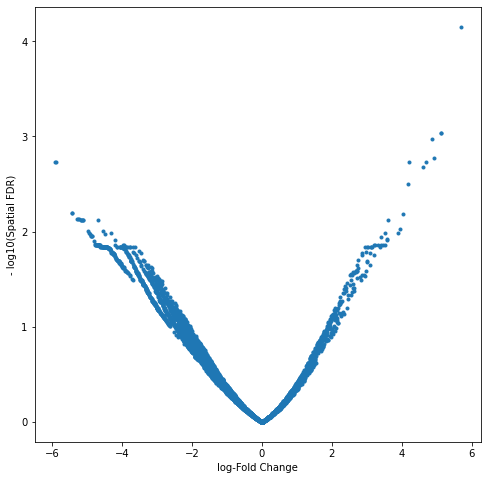

In [21]:
plt.plot(DA_results.logFC, -np.log10(DA_results.SpatialFDR), '.');
plt.xlabel("log-Fold Change");
plt.ylabel("- log10(Spatial FDR)")

In [23]:
%%R
milo <- buildNhoodGraph(milo)

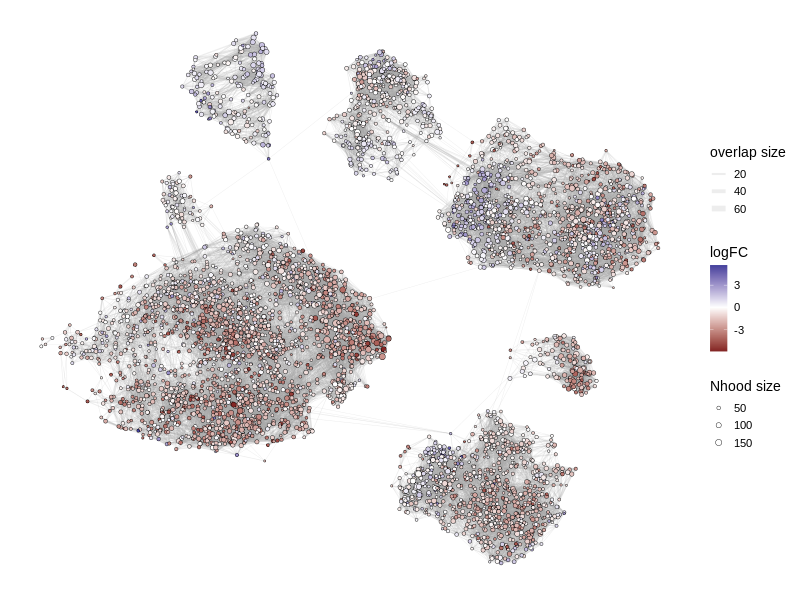

In [24]:
%%R -w 800 -h 600
library(ggplot2)
plotNhoodGraphDA(milo, DA_results, alpha=1)
#ggsave("./figures/milo_stroma_neighborhood.pdf")

In [25]:
DA_results

,logFC,logCPM,F,PValue,FDR,Nhood,SpatialFDR
1,-0.444822,8.337937,0.226461,0.634161,0.778745,1.0,0.761859
2,-2.344882,9.095475,6.352270,0.011725,0.080893,2.0,0.071614
3,-0.360767,8.177112,0.140833,0.707455,0.825886,3.0,0.811458
4,-3.068690,8.235741,7.094369,0.007734,0.064591,4.0,0.057207
5,-2.735413,8.446781,6.485583,0.010877,0.077711,5.0,0.068864
...,...,...,...,...,...,...,...
4890,-0.158641,8.147780,0.027961,0.867201,0.926858,4890.0,0.921048
4891,-1.271804,9.135771,2.171105,0.140629,0.325562,4891.0,0.300265
4892,-1.032731,8.808191,1.398709,0.236943,0.438909,4892.0,0.412322
4893,-2.464350,8.295002,5.163072,0.023074,0.113380,4893.0,0.100973


In [26]:
%%R
DA_results <- annotateNhoods(milo, DA_results, coldata_col = "annotation") #### combine with pre-defined cell clusters
#DA_results$cell_states <- ifelse(DA_results$annotation_fraction < 0.7, "Mixed", DA_results$annotation)
head(DA_results)

       logFC   logCPM         F      PValue        FDR Nhood SpatialFDR
1 -0.4448225 8.337937 0.2264613 0.634161427 0.77874482     1 0.76185948
2 -2.3448817 9.095475 6.3522701 0.011724871 0.08089291     2 0.07161415
3 -0.3607668 8.177112 0.1408327 0.707455459 0.82588580     3 0.81145809
4 -3.0686900 8.235741 7.0943693 0.007734056 0.06459125     4 0.05720662
5 -2.7354128 8.446781 6.4855831 0.010876972 0.07771080     5 0.06886419
6  1.1170843 8.241540 1.4730268 0.224871988 0.42755381     6 0.40092294
         annotation annotation_fraction       cell_states
1                F3           0.7777778                F3
2 Differentiated_KC           1.0000000 Differentiated_KC
3                F3           0.9655172                F3
4                F2           0.6060606             Mixed
5         Schwann_1           0.9565217         Schwann_1
6                F2           1.0000000                F2


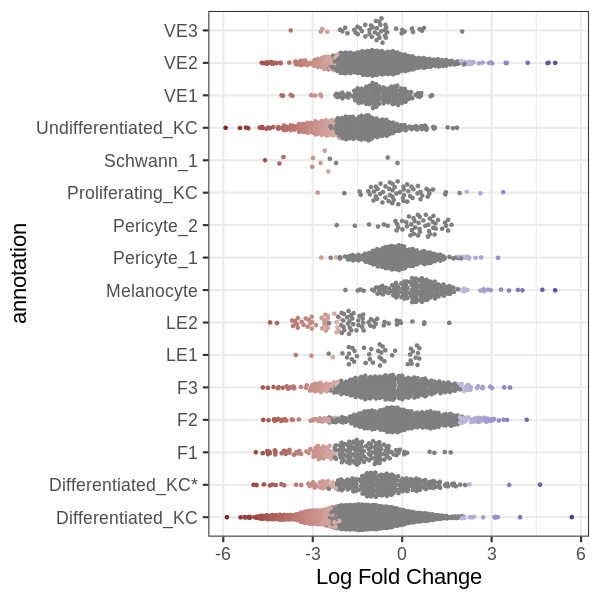

In [29]:
%%R -w 600 -h 600
plotDAbeeswarm(DA_results, group.by = "annotation") ### "cell_states" represents pre-defined/pre-annotated cell clusters

In [30]:
%%R
DA_results$NhoodGroup <- rep('NA',nrow(DA_results))
DA_results$NhoodGroup[which(DA_results$annotation == "F2" &
                        DA_results$logFC > 0 &
                        DA_results$SpatialFDR < 0.1)] <- 'F2_CTCL'
DA_results$NhoodGroup[which(DA_results$annotation == "F2" &
                        DA_results$logFC < 0 &
                        DA_results$SpatialFDR < 0.1)] <- 'F2_Other'
head(DA_results)

       logFC   logCPM         F      PValue        FDR Nhood SpatialFDR
1 -0.4448225 8.337937 0.2264613 0.634161427 0.77874482     1 0.76185948
2 -2.3448817 9.095475 6.3522701 0.011724871 0.08089291     2 0.07161415
3 -0.3607668 8.177112 0.1408327 0.707455459 0.82588580     3 0.81145809
4 -3.0686900 8.235741 7.0943693 0.007734056 0.06459125     4 0.05720662
5 -2.7354128 8.446781 6.4855831 0.010876972 0.07771080     5 0.06886419
6  1.1170843 8.241540 1.4730268 0.224871988 0.42755381     6 0.40092294
         annotation annotation_fraction       cell_states NhoodGroup
1                F3           0.7777778                F3         NA
2 Differentiated_KC           1.0000000 Differentiated_KC         NA
3                F3           0.9655172                F3         NA
4                F2           0.6060606             Mixed   F2_Other
5         Schwann_1           0.9565217         Schwann_1         NA
6                F2           1.0000000                F2         NA


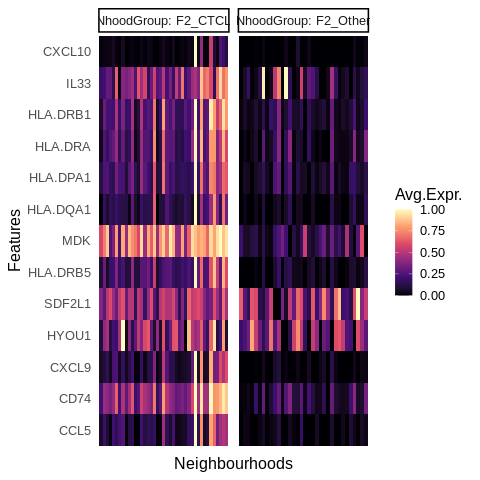

In [35]:
%%R
library(ggplot2)
markers <- c('CCL5','CD74','CXCL9','HYOU1','SDF2L1','HLA-DRB5','MDK','HLA-DQA1','HLA-DPA1','HLA-DRA','HLA-DRB1','IL33','CXCL10')
plotNhoodExpressionGroups(milo, DA_results, features=markers,
                          subset.nhoods = DA_results$NhoodGroup %in% c('F2_CTCL','F2_Other'), scale=T,
                          grid.space = "fixed")

In [36]:
%%R
#DA_results$NhoodGroup[which(DA_results$cell_states == "F2")]
DA_results$NhoodGroup <- rep('NA',nrow(DA_results))
DA_results$NhoodGroup[which(DA_results$annotation == "F3" &
                        DA_results$logFC > 0 &
                        DA_results$SpatialFDR < 0.1)] <- 'F3_CTCL'
DA_results$NhoodGroup[which(DA_results$annotation == "F3" &
                        DA_results$logFC < 0 &
                        DA_results$SpatialFDR < 0.1)] <- 'F3_Other'
head(DA_results)

       logFC   logCPM         F      PValue        FDR Nhood SpatialFDR
1 -0.4448225 8.337937 0.2264613 0.634161427 0.77874482     1 0.76185948
2 -2.3448817 9.095475 6.3522701 0.011724871 0.08089291     2 0.07161415
3 -0.3607668 8.177112 0.1408327 0.707455459 0.82588580     3 0.81145809
4 -3.0686900 8.235741 7.0943693 0.007734056 0.06459125     4 0.05720662
5 -2.7354128 8.446781 6.4855831 0.010876972 0.07771080     5 0.06886419
6  1.1170843 8.241540 1.4730268 0.224871988 0.42755381     6 0.40092294
         annotation annotation_fraction       cell_states NhoodGroup
1                F3           0.7777778                F3         NA
2 Differentiated_KC           1.0000000 Differentiated_KC         NA
3                F3           0.9655172                F3         NA
4                F2           0.6060606             Mixed         NA
5         Schwann_1           0.9565217         Schwann_1         NA
6                F2           1.0000000                F2         NA


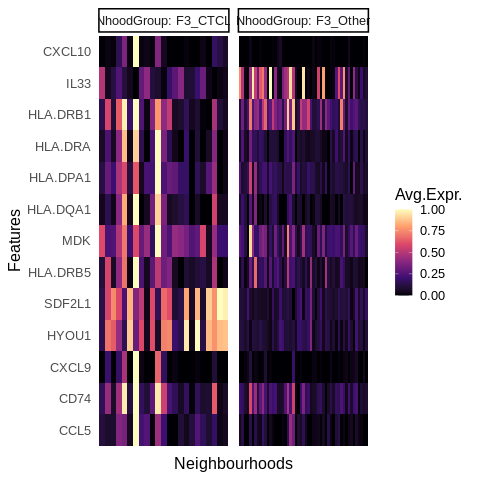

In [37]:
%%R
markers <- c('CCL5','CD74','CXCL9','HYOU1','SDF2L1','HLA-DRB5','MDK','HLA-DQA1','HLA-DPA1','HLA-DRA','HLA-DRB1','IL33','CXCL10')
plotNhoodExpressionGroups(milo, DA_results, features=markers,
                          subset.nhoods = DA_results$NhoodGroup %in% c('F3_CTCL','F3_Other'), scale=T,
                          grid.space = "fixed")